In [54]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import OneCycleLR
import torchvision.datasets as datasets
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [18]:
!pip install torch_lr_finder

# Github functions part

In [55]:
from torch_lr_finder import LRFinder

# Enable anomaly detection
torch.autograd.set_detect_anomaly(True)

# Define transformations
# Train Phase transformations
train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616)),
    transforms.RandomApply([transforms.RandomCrop(size=(32, 32), padding=8)], p=0.5)  # Applying CutOut with 1 hole of size 8x8
])

# Test Phase transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# Load CIFAR-10 dataset
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transforms)

# Define data loaders
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)
if cuda:
    torch.cuda.manual_seed(SEED)

# Dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=64, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# Train dataloader
train_loader = torch.utils.data.DataLoader(trainset, **dataloader_args)

# Test dataloader
test_loader = torch.utils.data.DataLoader(testset, **dataloader_args)

# Move model to GPU if available
device = torch.device("cuda" if cuda else "cpu")
# Example: Assuming 'model' is your defined neural network model
# model = YourModel()
# model.to(device)

for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


In [56]:
!git clone https://github.com/Anubis997/TSAI_ERA

fatal: destination path 'TSAI_ERA' already exists and is not an empty directory.


In [57]:
cd /content/TSAI_ERA/

/content/TSAI_ERA


In [58]:
ls

Assignment-10/  README.md


In [59]:
cd Assignment-10/

/content/TSAI_ERA/Assignment-10


In [60]:
from custom_resnet import Layer
model=Layer()
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         PrepBlock-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,856
       BatchNorm2d-6          [-1, 128, 32, 32]             256
              ReLU-7          [-1, 128, 32, 32]               0
         MaxPool2d-8          [-1, 128, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]         147,584
      BatchNorm2d-10          [-1, 128, 32, 32]             256
             ReLU-11          [-1, 128, 32, 32]               0
           Conv2d-12          [-1, 128, 32, 32]         147,584
      BatchNorm2d-13          [-1, 128, 32, 32]             256
             ReLU-14          [-1,

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.10E-02


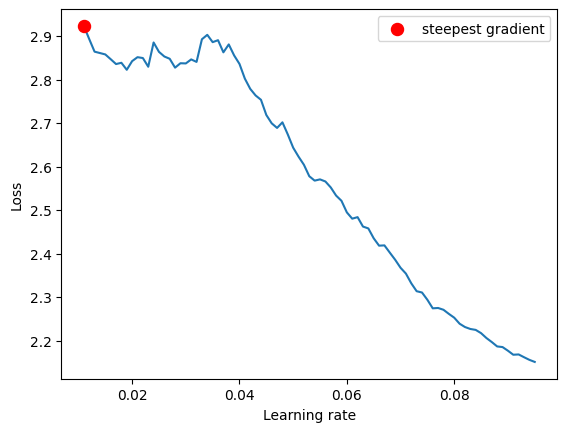

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=0.1, num_iter=100, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

# Traing and results part

In [62]:

# Set LRMAX and LRMIN (example values)
LRMAX =  1.10E-02  # Example value
LRMIN = LRMAX / 10  # Example value, LRMIN as 1/10th of LRMAX

# Calculate the total number of steps (batches) per epoch

total_epochs = 24
total_steps = total_epochs * len(train_loader)
optimizer = optim.Adam(model.parameters(), lr=LRMIN)
scheduler = OneCycleLR(optimizer, max_lr=LRMAX, total_steps=total_steps, pct_start=5/24,div_factor=10,final_div_factor=10)


In [63]:
from train_and_test import train, test

In [64]:
lr_list=[]
for epoch in range(25):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer,scheduler, epoch)
    lr_list.append(scheduler.get_last_lr())
    print(scheduler.get_last_lr())
    test(model, device, test_loader)

EPOCH: 0


Loss=1.4406437873840332 Batch_id=781 Accuracy=47.24: 100%|██████████| 782/782 [00:55<00:00, 14.09it/s]

[0.0020458335980347558]



Test set: Average loss: 1.3297, Accuracy: 5491/10000 (54.91%)

EPOCH: 1


Loss=1.0807737112045288 Batch_id=781 Accuracy=59.76: 100%|██████████| 782/782 [00:55<00:00, 14.13it/s]

[0.0045218793637869506]



Test set: Average loss: 1.2329, Accuracy: 5567/10000 (55.67%)

EPOCH: 2


Loss=0.9087685346603394 Batch_id=781 Accuracy=67.09: 100%|██████████| 782/782 [00:55<00:00, 14.17it/s]

[0.007581904054622196]



Test set: Average loss: 0.8398, Accuracy: 7118/10000 (71.18%)

EPOCH: 3


Loss=0.8128547668457031 Batch_id=781 Accuracy=72.59: 100%|██████████| 782/782 [00:55<00:00, 14.10it/s]

[0.010056503968153465]



Test set: Average loss: 0.7044, Accuracy: 7615/10000 (76.15%)

EPOCH: 4


Loss=0.6193452477455139 Batch_id=781 Accuracy=76.97: 100%|██████████| 782/782 [00:55<00:00, 14.09it/s]

[0.010999999878284207]



Test set: Average loss: 0.6156, Accuracy: 7826/10000 (78.26%)

EPOCH: 5


Loss=0.4739171862602234 Batch_id=781 Accuracy=80.02: 100%|██████████| 782/782 [00:55<00:00, 14.14it/s]

[0.01092554767970249]



Test set: Average loss: 0.5773, Accuracy: 8105/10000 (81.05%)

EPOCH: 6


Loss=0.241121307015419 Batch_id=781 Accuracy=82.50: 100%|██████████| 782/782 [00:58<00:00, 13.36it/s]

[0.01070460094039142]



Test set: Average loss: 0.4804, Accuracy: 8406/10000 (84.06%)

EPOCH: 7


Loss=0.2542540431022644 Batch_id=781 Accuracy=84.25: 100%|██████████| 782/782 [00:55<00:00, 14.15it/s]

[0.010343186511434243]



Test set: Average loss: 0.7206, Accuracy: 7789/10000 (77.89%)

EPOCH: 8


Loss=0.23916074633598328 Batch_id=781 Accuracy=86.19: 100%|██████████| 782/782 [00:55<00:00, 14.14it/s]

[0.009851162836315808]



Test set: Average loss: 0.5682, Accuracy: 8308/10000 (83.08%)

EPOCH: 9


Loss=0.34937992691993713 Batch_id=781 Accuracy=87.58: 100%|██████████| 782/782 [00:55<00:00, 14.12it/s]

[0.00924195103828335]



Test set: Average loss: 0.4174, Accuracy: 8700/10000 (87.00%)

EPOCH: 10


Loss=0.5688714385032654 Batch_id=781 Accuracy=89.00: 100%|██████████| 782/782 [00:55<00:00, 14.11it/s]

[0.008532168827090564]



Test set: Average loss: 0.4208, Accuracy: 8698/10000 (86.98%)

EPOCH: 11


Loss=0.594460666179657 Batch_id=781 Accuracy=90.33: 100%|██████████| 782/782 [00:55<00:00, 14.05it/s]

[0.007741177211194654]



Test set: Average loss: 0.4688, Accuracy: 8681/10000 (86.81%)

EPOCH: 12


Loss=0.12190663069486618 Batch_id=781 Accuracy=91.32: 100%|██████████| 782/782 [00:55<00:00, 14.04it/s]

[0.006890552379916013]



Test set: Average loss: 0.3723, Accuracy: 8887/10000 (88.87%)

EPOCH: 13


Loss=0.02755286917090416 Batch_id=781 Accuracy=92.75: 100%|██████████| 782/782 [00:55<00:00, 14.08it/s]

[0.00600349716123848]



Test set: Average loss: 0.3070, Accuracy: 9107/10000 (91.07%)

EPOCH: 14


Loss=0.18841002881526947 Batch_id=781 Accuracy=93.66: 100%|██████████| 782/782 [00:55<00:00, 14.05it/s]

[0.0051042081091472]



Test set: Average loss: 0.3964, Accuracy: 8928/10000 (89.28%)

EPOCH: 15


Loss=0.11714055389165878 Batch_id=781 Accuracy=94.86: 100%|██████████| 782/782 [00:55<00:00, 14.00it/s]

[0.004217215484711631]



Test set: Average loss: 0.3299, Accuracy: 9125/10000 (91.25%)

EPOCH: 16


Loss=0.12053386867046356 Batch_id=781 Accuracy=95.86: 100%|██████████| 782/782 [00:55<00:00, 14.10it/s]

[0.003366714134509169]



Test set: Average loss: 0.3109, Accuracy: 9221/10000 (92.21%)

EPOCH: 17


Loss=0.2681376338005066 Batch_id=781 Accuracy=96.58: 100%|██████████| 782/782 [00:55<00:00, 14.03it/s]

[0.00257590351828179]



Test set: Average loss: 0.2971, Accuracy: 9251/10000 (92.51%)

EPOCH: 18


Loss=0.2028554528951645 Batch_id=781 Accuracy=97.24: 100%|██████████| 782/782 [00:55<00:00, 14.04it/s]

[0.0018663548881507539]



Test set: Average loss: 0.3276, Accuracy: 9221/10000 (92.21%)

EPOCH: 19


Loss=0.18906556069850922 Batch_id=781 Accuracy=97.85: 100%|██████████| 782/782 [00:55<00:00, 13.99it/s]

[0.0012574228810908038]



Test set: Average loss: 0.3209, Accuracy: 9273/10000 (92.73%)

EPOCH: 20


Loss=0.515851616859436 Batch_id=781 Accuracy=98.26: 100%|██████████| 782/782 [00:55<00:00, 13.98it/s]

[0.000765717574887263]



Test set: Average loss: 0.3056, Accuracy: 9296/10000 (92.96%)

EPOCH: 21


Loss=0.13284146785736084 Batch_id=781 Accuracy=98.44: 100%|██████████| 782/782 [00:55<00:00, 14.02it/s]

[0.00040465140851329655]



Test set: Average loss: 0.3105, Accuracy: 9305/10000 (93.05%)

EPOCH: 22


Loss=0.0028854766860604286 Batch_id=781 Accuracy=98.66: 100%|██████████| 782/782 [00:55<00:00, 13.99it/s]

[0.00018407332575833614]



Test set: Average loss: 0.3039, Accuracy: 9319/10000 (93.19%)

EPOCH: 23


Loss=0.45376747846603394 Batch_id=781 Accuracy=98.60: 100%|██████████| 782/782 [00:59<00:00, 13.07it/s]

[0.00011000012171579072]



Test set: Average loss: 0.3049, Accuracy: 9331/10000 (93.31%)

EPOCH: 24


  0%|          | 0/782 [00:02<?, ?it/s]


ValueError: Tried to step 18769 times. The specified number of total steps is 18768

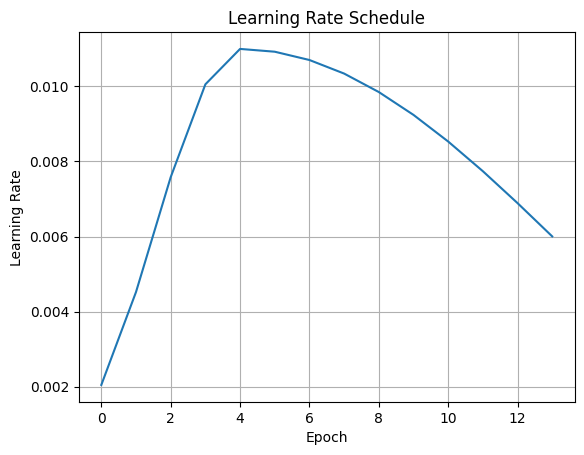

In [53]:
import matplotlib.pyplot as plt

plt.plot(lr_list)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.grid(True)
plt.show()